In [19]:
%matplotlib inline

1. Getting Started with Pre-trained Model on CIFAR10
=======================================================

[CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) is a
dataset of tiny (32x32) images with labels, collected by Alex Krizhevsky,
Vinod Nair, and Geoffrey Hinton. It is widely used as benchmark in
computer vision research.

![mage-cifar10](https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/datasets/cifar10.png)

In this tutorial, we will demonstrate how to load a pre-trained model from `gluoncv-model-zoo`
and classify images from the Internet or your local disk.

In [2]:
import matplotlib.pyplot as plt

from mxnet import gluon, nd, image
from mxnet.gluon.data.vision import transforms
from gluoncv import utils
from gluoncv.model_zoo import get_model

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Then, we download and show the example image:



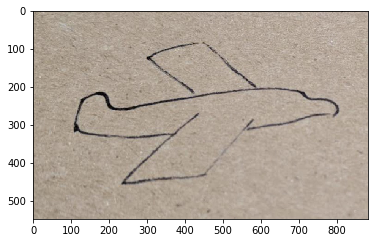

In [15]:
url = 'https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/classification/plane-draw.jpeg'
im_fname = utils.download(url)

img = image.imread(im_fname)

plt.imshow(img.asnumpy())
plt.show()

In case you don't recognize it, the image is a poorly-drawn airplane :)

Now we define transformations for the image.



In [6]:
transform_fn = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
])

This transformation function does three things:
resize and crop the image to 32x32 in size,
transpose it to `num_channels*height*width`,
and normalize with mean and standard deviation calculated across all CIFAR10 images.

What does the transformed image look like?



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


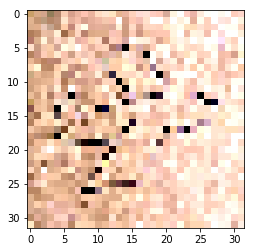

In [16]:
img = transform_fn(img)
plt.imshow(nd.transpose(img, (1,2,0)).asnumpy())
plt.show()

Can't recognize anything? *Don't panic!* Neither do I.
The transformation makes it more "model-friendly", instead of "human-friendly".

Next, we load a pre-trained model.



In [17]:
net = get_model('cifar_resnet110_v1', classes=10, pretrained=True)

Model file is not found. Downloading.


6336KB [00:25, 243.93KB/s]                                                                                             
C:\ProgramData\Anaconda3\lib\site-packages\mxnet\gluon\block.py:421: UserWarning: load_params is deprecated. Please use load_parameters.
  warnings.warn("load_params is deprecated. Please use load_parameters.")


Finally, we prepare the image and feed it to the model



In [20]:
pred = net(img.expand_dims(axis=0))

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
ind = nd.argmax(pred, axis=1).astype('int')
print('The input picture is classified as [%s], with probability %.3f.'%
      (class_names[ind.asscalar()], nd.softmax(pred)[0][ind].asscalar()))

The input picture is classified as [airplane], with probability 0.392.


Play with the scripts
---------------------

Here is a script that does all the previous steps in one go.

:download:`Download demo_cifar10.py<../../../scripts/classification/cifar/demo_cifar10.py>`

Feed in your own image to see how well it does the job.
Keep in mind that ``CIFAR10`` is a small dataset with only 10
classes. Models trained on ``CIFAR10`` only recognize objects from those
10 classes. Thus, it may surprise you if we feed one image to the model
which doesn't belong to any of the 10 classes

For instance we can test it with the following photo of Mt. Baker:

|image-mtbaker|

::

    python demo_cifar10.py --model cifar_resnet110_v1 --input-pic mt_baker.jpg

The result is:

::

    The input picture is classified to be [ship], with probability 0.949.

Next Step
---------

Congratulations! You’ve just finished reading the first tutorial.
There are a lot more to help you learn GluonCV.

If you would like to dive deeper into training on ``CIFAR10``,
feel free to read the next `tutorial on CIFAR10 <dive_deep_cifar10.html>`__.

Or, if you would like to try a larger scale dataset with 1000 classes of common objects
please read `Getting Started with ImageNet Pre-trained Models <demo_imagenet.html>`__.

.. |image-mtbaker| image:: https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/classification/mt_baker.jpg

